# Envelope of the Sinc Function

In [1]:
import DistExampB as db
from matplotlib import pyplot as plot
from matplotlib.colors import hsv_to_rgb

from math import pi
from numpy import sinc
from sympy import Symbol

from LocUtil import Grid1
from Map import LogRatio
from Sinc import SincApprox

### Setup

In [2]:
xSym = Symbol('x')
zSym = Symbol('z')

In [3]:
map_ = LogRatio(xSym,zSym, (0,2))
X2Z = map_.Forward
Z2X = map_.Inverse
map_.forSym

log(x/(2 - x))

## Create a Sinc-Approximation for the PDF Example B

### SetUp

In [4]:
dist = db.ExampB()
nPlot = 501

Text(0, 0.5, 'PDF (density in x)')

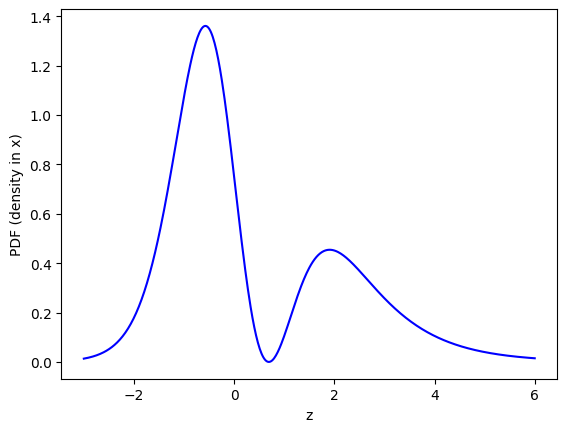

In [5]:
zGrid = Grid1(-3, 6, nPlot)
pdfGrid = tuple(dist.Pdf(Z2X(z)) for z in zGrid)

plot.plot(zGrid, pdfGrid, c='blue')

plot.xlabel('z')
plot.ylabel('PDF (density in x)')

### Create Sinc Approximation

In [6]:
zMin, zMax = -3, 6
nSinc = 13
sincZ = Grid1(zMin, zMax, nSinc)

In [7]:
sincV = tuple(dist.Pdf(Z2X(z)) for z in sincZ)

In [8]:
approx = SincApprox(zMin, zMax, nSinc, sincV, map_)
h = approx.h

(0.0001, 1.999596300862609)

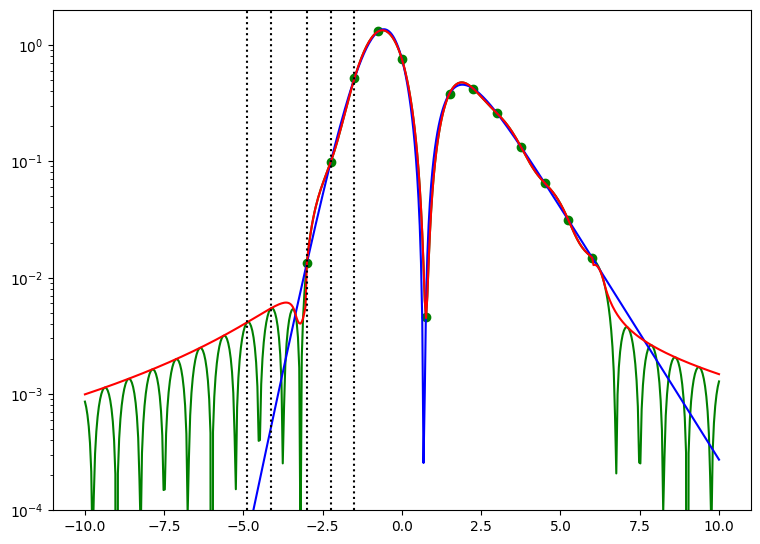

In [16]:
fig, ax = plot.subplots(figsize=(9, 6.5))

# plot the sinc points
plot.semilogy(sincZ, sincV, 'o', c='green')

# plot the sinc-approximation
zGrid = Grid1(-10, 10, nPlot)
approxGrid = approx.InterpZ1(zGrid)
absAprox = tuple(abs(v) for v in approxGrid)

plot.semilogy(zGrid, absAprox, c='green')

# plot the ture pdf
pdfGrid = tuple(dist.Pdf(Z2X(z)) for z in zGrid)
plot.semilogy(zGrid,pdfGrid, c='blue')

# plot the envelope
envGrid = tuple(approx.EnvZ(z) for z in zGrid)
plot.plot(zGrid,envGrid, c='red')

# add decorations
yRange = (1e-4, 1.5*max(approxGrid))
plot.semilogy([zMin + 2*h for _ in range(2)], yRange, ':', c='black')
plot.semilogy([zMin + 1*h for _ in range(2)], yRange, ':', c='black')
plot.semilogy([zMin for _ in range(2)], yRange, ':', c='black')
plot.semilogy([zMin - 1.5*h for _ in range(2)], yRange, ':', c='black')
plot.semilogy([zMin - 2.5*h for _ in range(2)], yRange, ':', c='black')

ax.set_ylim(*yRange)